# KNN CLASSIFICATION ALGORITHM

### Creating knn classification algorithm 

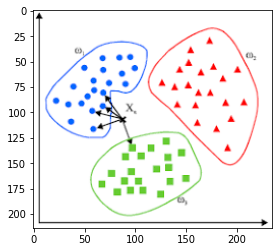

In [3]:
import matplotlib.pyplot as plt
import cv2
image = cv2.imread("./image.png")
plt.imshow(image)

Algorithm : 

    - Finding distence with all predicted point to the label which is nearest
    - Then sort that data according to highest count to lowest
    - Then select top k nearest neighbors 
    - Then return most occurence class 

In [4]:
class Knn_classification:
    # defining n-neighbors in contructor 
    def __init__(self,n_neighbors):
        self.n_neighbors=n_neighbors
    # in this fit method we just assigning variables     
    def fit(self,features,labels):
        self.features = features.astype(int)
        self.labels = labels
    # this is main method where actual algorithm implemented      
    def distance_from_k(self,point):
        # here what we does is we measure distance from point to every near neighbor of features
        distance_arr=[]
        for distance,point_class in zip(self.features,self.labels):
            # measuring distance with the distance formula (x-x1)**2 + (y-y1)**2
            distance = ((point-distance)**2).sum()
            # storing distance with class
            distance_arr.append([distance,point_class])
            # now will have every point distance with our point
        
        # so will sort an list by it's distance
        sorted_distance_list = sorted(distance_arr)
        # now will find most counted class item 
        item,count = np.unique(np.array(sorted_distance_list[:self.n_neighbors]),return_counts=True)
        ans = item[np.argmax(count)]
        return ans
    def predict(self,features):
        result = []
        for point in features:
            result.append(self.distance_from_k(point))
        return result
    def score(self,actual_data,predicted_data):
        return (sum(actual_data)-sum(predicted_data))/len(predicted_data)

In [5]:
import numpy as np

In [6]:
dataset = np.load("mnist_train_small.npy")

In [7]:
features = dataset[:, 1:]
labels =   dataset[:, 0]

In [8]:
model = Knn_classification(5)

In [9]:
model.fit(features,labels)
prediction = model.predict(features[:10])

[5, 7, 9, 5, 2, 0, 6, 5, 5, 2]

In [10]:
labels[:10]

array([5, 7, 9, 5, 2, 0, 6, 5, 5, 2], dtype=uint8)

In [11]:
model.score(features[:100],y_test[:100])

NameError: name 'X_test' is not defined